In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
col=data.columns.tolist()
col

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [6]:
col1=[]
for c in col:
    if c != 'Outcome' :
        col1.append(c)
col1

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

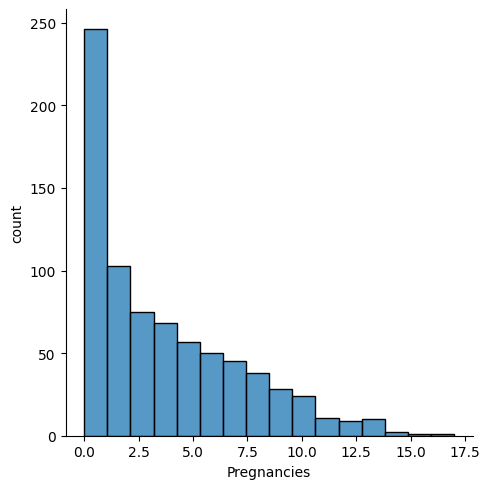

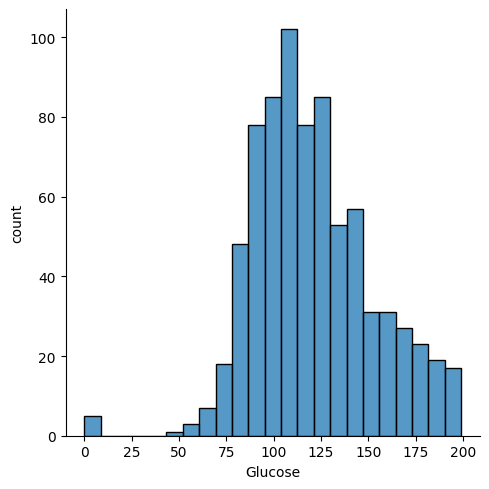

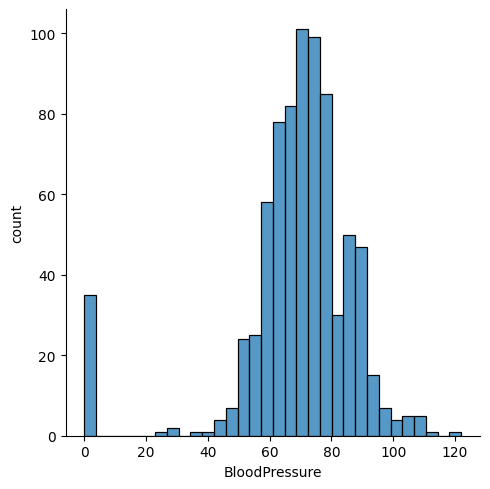

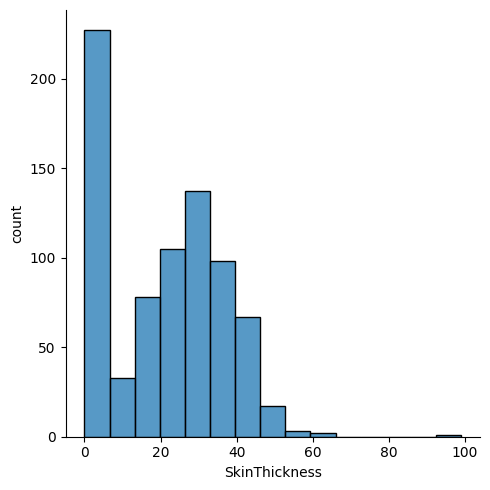

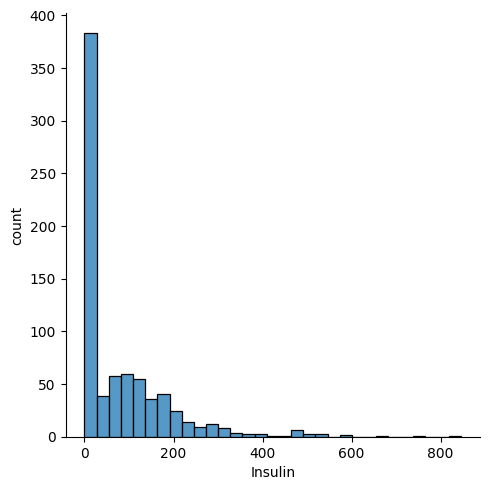

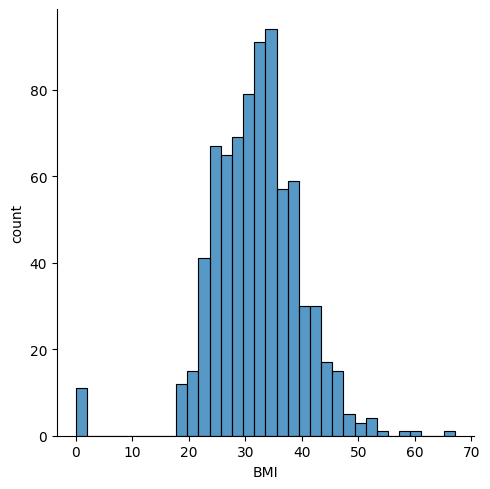

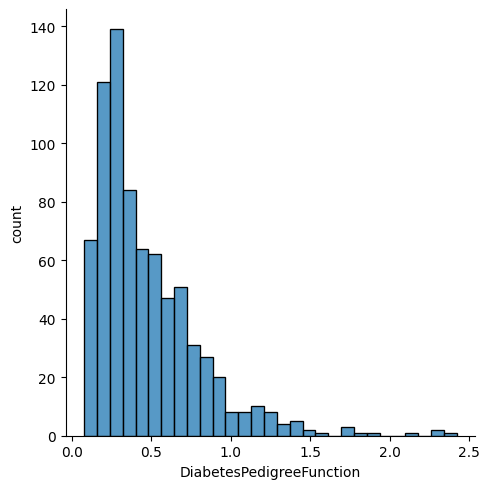

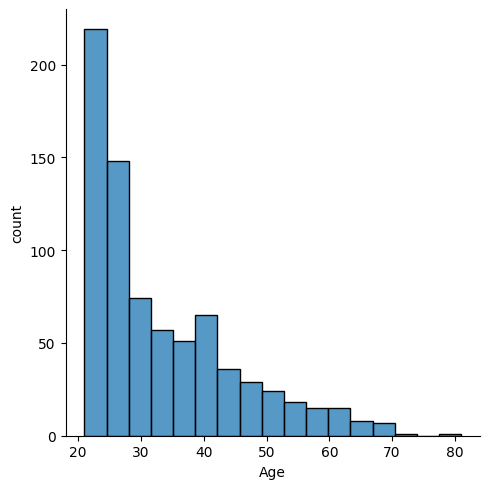

In [11]:
for c in col1 :
    sns.displot(data[c])
    plt.xlabel(c)
    plt.ylabel('count')
    plt.show()

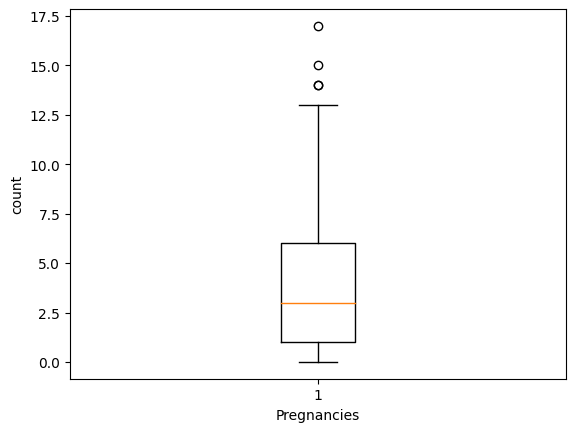

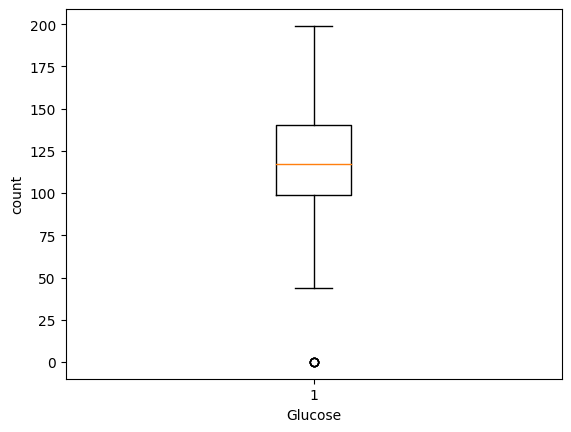

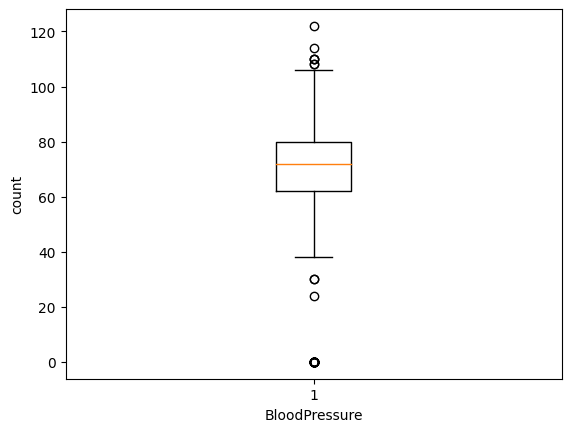

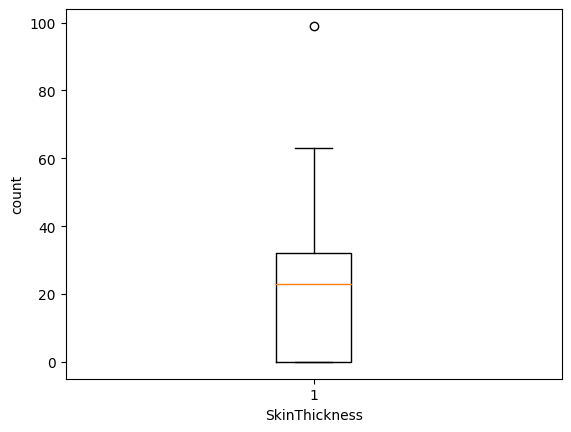

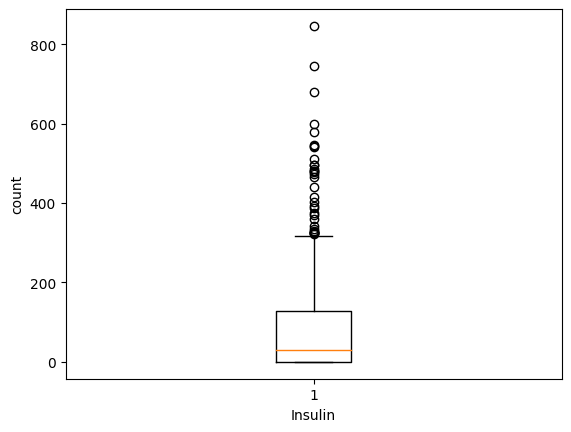

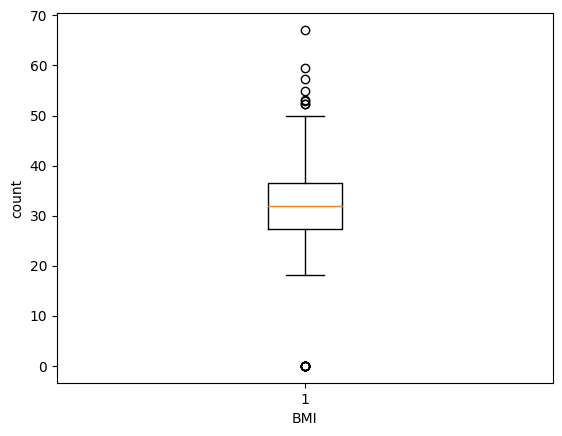

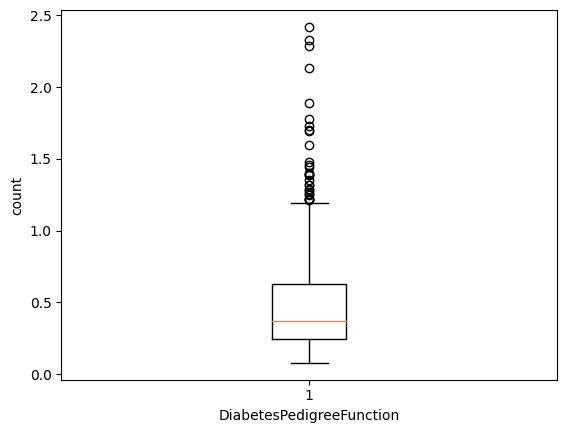

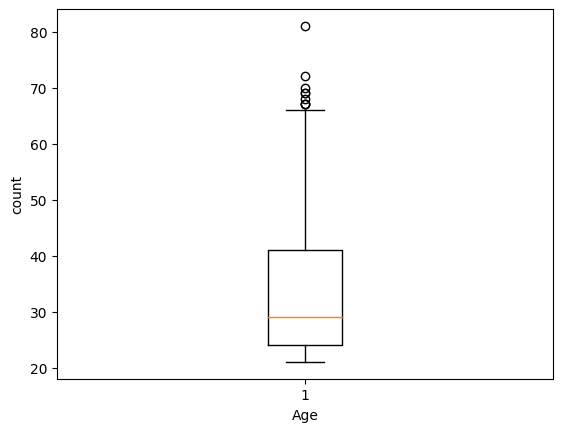

In [12]:
for c in col1 :
    plt.boxplot(data[c])
    plt.xlabel(c)
    plt.ylabel('count')
    plt.show()

In [15]:
def outlier(c):
    Q1=data[c].quantile(0.25)
    Q3=data[c].quantile(0.75)
    IQR=Q3-Q1
    u=Q3+(1.5*IQR)
    l=Q1-(1.5*IQR)
    return u,l

In [17]:
for c in col1:
    u,l=outlier(c)
    data=data[((data[c]>l) & (data[c]<u))]

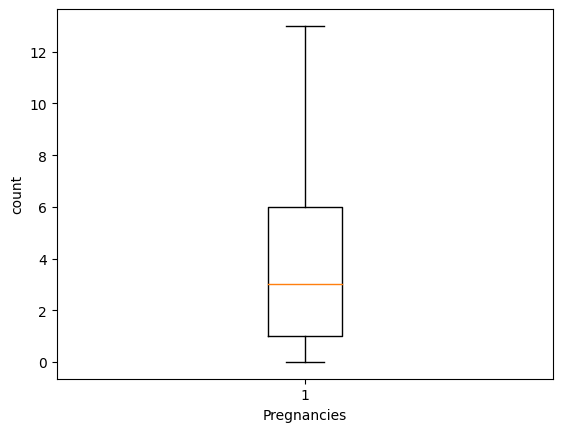

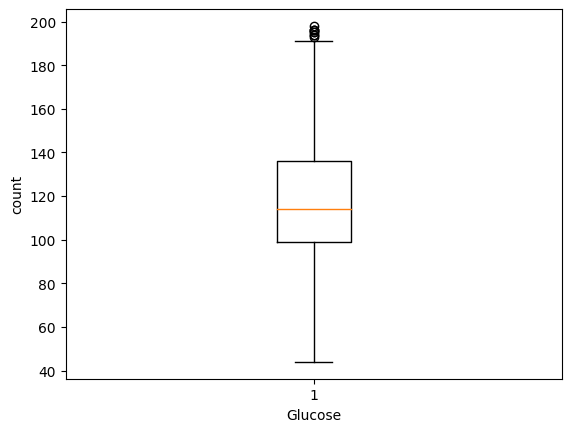

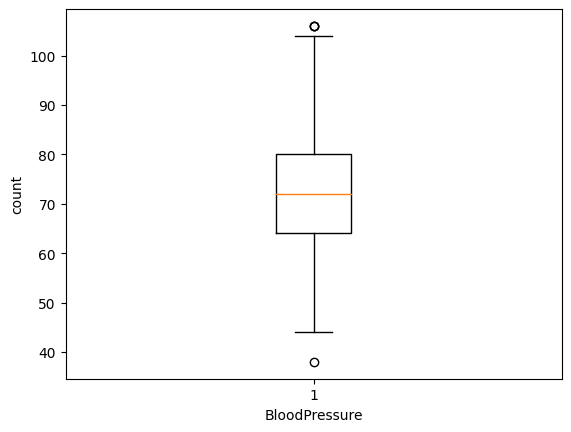

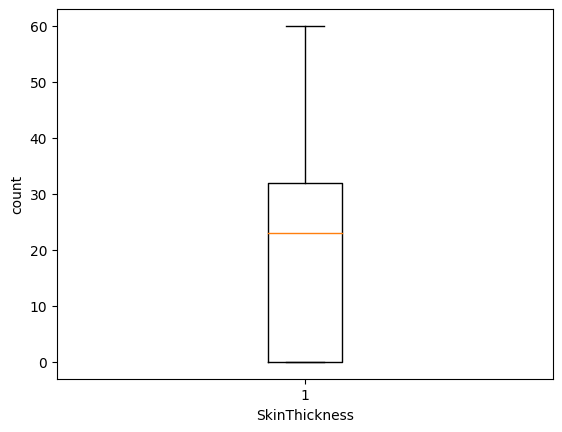

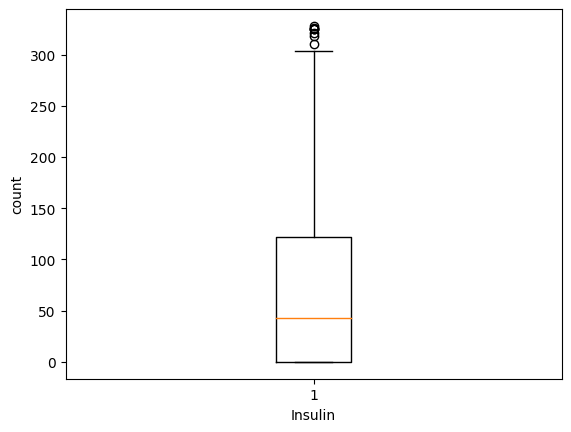

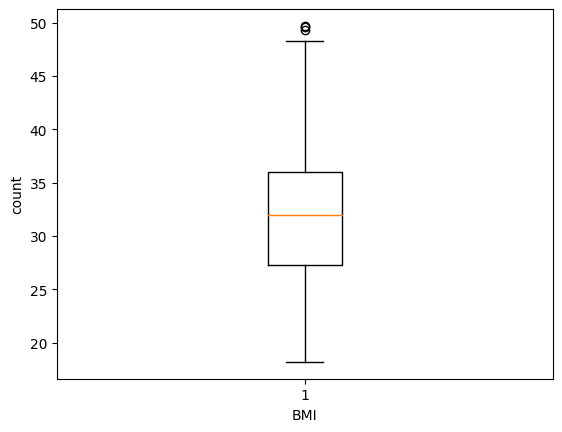

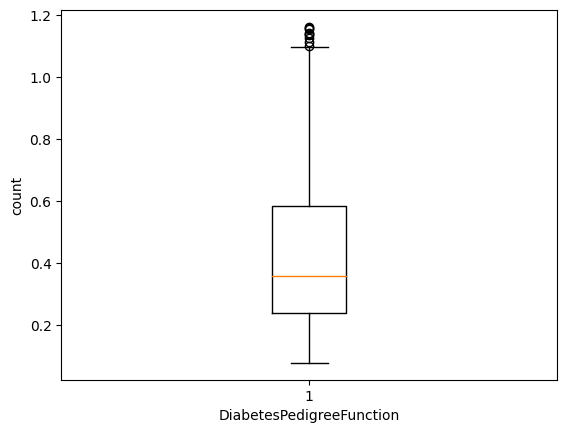

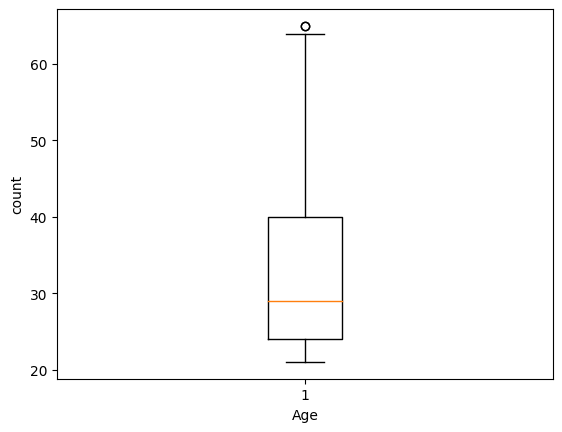

In [18]:
for c in col1 :
    plt.boxplot(data[c])
    plt.xlabel(c)
    plt.ylabel('count')
    plt.show()

In [19]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [23]:
x=data[col1]
vif_data=pd.DataFrame()
vif_data['features']=x.columns
vif_data['vif']=[vif(x.values,i)for i in range(len(x.columns))]
vif_data

,features,vif
0,Pregnancies,3.561946
1,Glucose,20.855905
2,BloodPressure,36.986096
3,SkinThickness,4.444340
4,Insulin,2.527721
5,BMI,30.787774
6,DiabetesPedigreeFunction,4.211748
7,Age,17.225685


In [29]:
data=data.drop(['BloodPressure'],axis=1)

In [30]:
col1=[]
for c in data.columns:
    if c != 'Outcome' :
        col1.append(c)
col1

['Pregnancies',
 'Glucose',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [31]:
x=data[col1]
vif_data=pd.DataFrame()
vif_data['features']=x.columns
vif_data['vif']=[vif(x.values,i)for i in range(len(x.columns))]
vif_data

,features,vif
0,Pregnancies,3.552887
1,Glucose,18.403917
2,SkinThickness,4.439451
3,Insulin,2.470412
4,BMI,21.222396
5,DiabetesPedigreeFunction,4.190272
6,Age,15.012583


In [33]:
data=data.drop(['BMI'],axis=1)

col1=[]
for c in data.columns:
    if c != 'Outcome' :
        col1.append(c)

x=data[col1]
vif_data=pd.DataFrame()
vif_data['features']=x.columns
vif_data['vif']=[vif(x.values,i)for i in range(len(x.columns))]
vif_data 

,features,vif
0,Pregnancies,3.539979
1,Glucose,11.979219
2,SkinThickness,3.403494
3,Insulin,2.376745
4,DiabetesPedigreeFunction,3.958300
5,Age,13.933113


In [34]:
data=data.drop(['Age'],axis=1)

col1=[]
for c in data.columns:
    if c != 'Outcome' :
        col1.append(c)

x=data[col1]
vif_data=pd.DataFrame()
vif_data['features']=x.columns
vif_data['vif']=[vif(x.values,i)for i in range(len(x.columns))]
vif_data 

,features,vif
0,Pregnancies,2.404864
1,Glucose,5.921520
2,SkinThickness,3.391591
3,Insulin,2.331073
4,DiabetesPedigreeFunction,3.829061


In [35]:
x=data[col1]
y=data['Outcome']

In [36]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,train_size=0.8,random_state=0)

In [38]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [39]:
log.fit(x_train,y_train)

LogisticRegression()

In [41]:
test_pred=log.predict(x_test)
test_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score as acs
acs(y_test,test_pred)

0.7265625